In [1]:
import csv
import os
import random
import sklearn.model_selection

from shutil import copyfile

In [2]:
TRAIN_TEST_CSV_PATH = '../C1-P1_Train Dev_fixed/train.csv'
TRAIN_CSV_PATH = '../C1-P1_Train Dev_fixed/train_split.csv'
VALID_CSV_PATH = '../C1-P1_Train Dev_fixed/dev.csv'

ORIGINAL_TRAIN_TEST_DATA_PATH = '../C1-P1_Train Dev_fixed/C1-P1_Train/' 
ORIGINAL_VALID_DATA_PATH = '../C1-P1_Train Dev_fixed/C1-P1_Dev/' 


In [73]:
# consolidate all images into a set
data = []
with open(TRAIN_TEST_CSV_PATH,'r') as fp:
    csv_reader = csv.reader(fp, delimiter=',', )
    for idx, row in enumerate(csv_reader):
        if idx == 0:
            continue
        file = os.path.join(ORIGINAL_TRAIN_TEST_DATA_PATH, row[0])
        data.append(file)

with open(VALID_CSV_PATH,'r') as fp:
    csv_reader = csv.reader(fp, delimiter=',', )
    for idx, row in enumerate(csv_reader):
        if idx == 0:
            continue
        file = os.path.join(ORIGINAL_VALID_DATA_PATH, row[0])
        data.append(file)
        
assert len(data) == 6400

In [101]:
import matplotlib.image as mpimg
from tqdm import tqdm

img_size = []
for datum in tqdm(data):
    img=mpimg.imread(datum)
    img_size.append([img.shape[1], img.shape[0]])

len(img_size)

100%|██████████| 6400/6400 [01:30<00:00, 71.03it/s]


6400

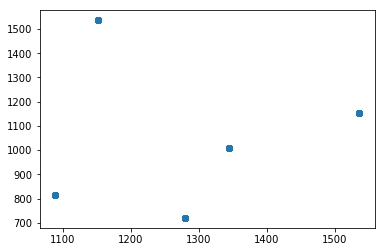

In [117]:
%matplotlib inline
import matplotlib.pyplot as plt
img_size1 = [[size[0], size[1]] for size in img_size]

widths = []
heights = []
idx_landscape_image = []
for idx, size in enumerate(img_size):
    width = size[0]
    height = size[1]
    widths.append(width)
    heights.append(height)
    if height > width:
#             print("width: ", width, ", height: ", height)
        assert width == 1152
        assert height == 1536
        idx_landscape_image.append(idx)
plt.scatter(widths, heights)
plt.show()

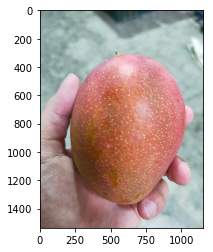

In [125]:
idx = random.randint(0, len(idx_landscape_image)-1)
idx = idx_landscape_image[idx]

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img=mpimg.imread(data[idx])
imgplot = plt.imshow(img)
plt.show()

file:  ../C1-P1_Train Dev_fixed/C1-P1_Train/01247.jpg  -- width: 1344  , height: 1008


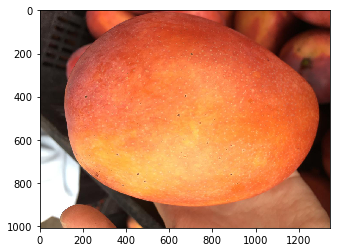

In [98]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
idx = random.randint(0, len(data)-1)
img=mpimg.imread(data[idx])

print("file: ", data[idx], " -- width:", img.shape[1], " , height:", img.shape[0])
imgplot = plt.imshow(img)
plt.show()

# Split data from train dataset. get last 100 records as test dataset

In [ ]:
new_train_data = []
new_test_data = []
all_data = []

TEST_CSV_PATH = '../C1-P1_Train Dev_fixed/test_split.csv'

with open(TRAIN_TEST_CSV_PATH) as csv_file:

    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count == 0:
            line_count += 1
            continue  #header
        all_data.append(row)
        
        line_count += 1
        
indices = list(range(len(all_data)))

random.shuffle(indices)
training_dataset, test_dataset = sklearn.model_selection.train_test_split(indices, train_size=len(all_data)-NUM_TEST_DATASET, test_size=NUM_TEST_DATASET)

for idx in training_dataset:
    new_train_data.append(all_data[idx])
for idx in test_dataset:
    new_test_data.append(all_data[idx])  

with open(TRAIN_CSV_PATH, 'w') as f:

    writer = csv.writer(f)
    
    writer.writerow(['image_id','label'])
    for row in new_train_data:
        writer.writerow(row)
        
with open(TEST_CSV_PATH, 'w') as f:

    writer = csv.writer(f)
    
    writer.writerow(['image_id','label'])
    for row in new_test_data:
        writer.writerow(row)

In [ ]:
# parse csv file and make the folder structure for pytorch test dataset
def prepare_file_structure_for_pytorch(csv_path, src_data_path, dst_data_path):
    with open(csv_path) as csv_file:

        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            if line_count == 0:
                line_count += 1
                continue  #header

            src_path = os.path.join(src_data_path, row[0])
            dest_path = os.path.join(dst_data_path, row[1], row[0])
            dest_folder_path = os.path.join(dst_data_path, row[1])
            if not os.path.exists(dest_folder_path):
                os.makedirs(dest_folder_path)
            if not os.path.isfile(dest_path):
                copyfile(src_path, dest_path)
        
            line_count += 1

In [ ]:
!rm -rf ../data/train
!rm -rf ../data/test
!rm -rf ../data/valid
# make file structure for training dataset
prepare_file_structure_for_pytorch(TRAIN_CSV_PATH, ORIGINAL_TRAIN_TEST_DATA_PATH, TRAIN_DATA_PATH)
    
# make file structure for validation dataset
prepare_file_structure_for_pytorch(VALID_CSV_PATH, ORIGINAL_VALID_DATA_PATH, VALID_DATA_PATH)

# make file structure for test dataset
prepare_file_structure_for_pytorch(TEST_CSV_PATH, ORIGINAL_TRAIN_TEST_DATA_PATH, TEST_DATA_PATH)